In [1]:
import janitor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresión lineal

In [2]:
%load_ext autoreload
%autoreload 2

### MNIST
El conjunto de datos MNIST contiene 70,000 imágenes pequeñas de dígitos escritos a mano. El conjunto consiste en imágenes en escala de grises de dígitos escritos a mano (números del 0 al 9). Cada imagen tiene una resolución de 28 * 28 píxeles.

Usamos solo data(ahi se encuentra las imagenes) y target(el numero a investigar)

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Extraer la información para las variables independiente y dependiente, en X tenemos 70k imágenes y 784 características.

Cada imagen tiene 784 características. Cada imagen tiene las dimensiones de `28 * 28` pixéles, cada características representa un pixel, desde 0 (blanco) a 255 (negro).

En Scikit-learn, el conjunto de datos MNIST es cargado como un objeto de tipo `Bunch`, que es un contenedor similar a un diccionario que contiene varios elementos, incluyendo los datos y las etiquetas.

`X.to_numpy()` convierte el objeto `X` a un arreglo NumPy.


In [7]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

Dibujamos el numero que se encuentra en la posición número 0 y modificamos la forma de 28x28

(-0.5, 27.5, 27.5, -0.5)

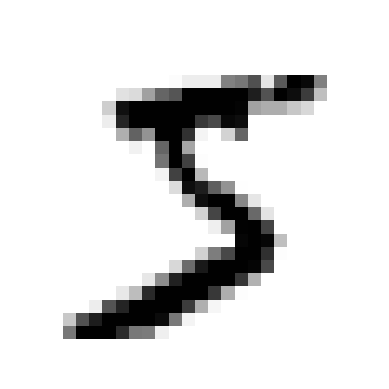

In [13]:
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')


Para comprobar que estamos viendo el número 5

In [14]:
y = y.astype(np.uint8)
y[0]

5

Dividimos el conjunto de entrenamiento y testing(asegurarnos que esten aletoriamente ordenado)

Debemos de crear el conjunto de entrenamiento y testing. El conjunto MNIST ya esta barajeado, siendo las primeras 60,000 imágenes para el conjunto de entrenamiento y las restantes 10,000 para el conjunto de testing. Gracias a que el conjunto ya se encuentra listo para ser utilizado podemos estar seguros de que la validación `cross-validation` serán similares, por lo que tendremos un resultado que nos garantice un correcto resultado.

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Entrenamiento del clasificador Binario

filtramos la información, como solo estamos buscando el 5 para este ejercicio

Este problema se encargará sólamente de detectar el número 5, por lo que filtraremos el conjunto para obtener solamente las imágenes que dibujan el número 5.

In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

usaremos el algoritmo de clasificación `SGDClassifier`

### SGDClassifier
Para comenzar utilizaremos el clasificador SGDClassifier (Stochastic Gradient Descent). Este clasificador funciona muy bien con largos conjuntos de datos, esto se debe a que toma cada instancia de entrenamiento de forma independiente, uno a la vez.

Este clasificador pertenecer a la familia de clasificadores lineales.

Algunas situaciones comunes para su implementación son:

* **Grandes conjuntos de datos**: Debido a su capacidad para trabajar con lotes pequeños de datos a la vez, este clasificador es eficiente para conjuntos de datos grandes que no caben en la memoria.
* **Problemas de clasificación binaria o multiclase**.
El SGDClassifier utiliza el método de Descenso de Gradiente Estocástico para optimizar una función de pérdida en lugar de utilizar el conjunto completo de datos en cada iteración. El descenso de gradiente estocástico es una técnica que actualiza los parámetros del modelo de forma iterativa, utilizando solo un pequeño lote de datos (minilote) en cada paso.

### Ventajas y desventajas
### Ventajas

1. Eficiencia en grandes conjuntos de datos
2. Adaptabilidad: Es adaptable y puede ser utilizado para problemas de clasificación lineal variados.

### Desventajas

1. Sensibilidad a la escala: Puede ser sensible a la escala de las características, por lo que la normalización de las características puede ser necesaria.
2. Necesidad de ajuste de hiperparámetros: Requiere ajuste de hiperparámetros, para obtener un rendimiento óptimo.

In [24]:
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [25]:
sgd_classifier = SGDClassifier(random_state=42)

sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
sgd_classifier.predict([some_digit])

/home/sathony/miniforge3/envs/regresion_lineal/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Medir rendimiento

Que tan preciso es este modelo para predecir las imagenes somo no 5 `cross_val_score`, cv=3 devidimo en 3 el entrenamiento luego se saca el promedio de la clasificacion

Evaluar clasificadores es más complicado que los algoritmos de regresión.

### Cross-Validation

Utilizaremos `cross_val_score()` para evaluar `SGDClassifier` utilizando validación cruzada de K-fold con tres pliegues. `K-fold cross-validation` significa dividir el conjunto de entrenamiento en `K` pliegues (en este caso 3).


In [26]:
from sklearn.model_selection import cross_val_score

Tiene una clasificación promedio de 95% exito

In [27]:
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Matriz de confusión
La idea general de la matriz de confusión es contar el número de veces que la instancia de clase A son clasificados como clase B.` cross_val_predict()` retorna la predicción escha en cada división hecha.

|||
|--|--|
|TN|FP|
|FN|TP|

In [28]:
from sklearn.model_selection import cross_val_predict

primero sacamos las predicción usando `cross_val_predict`

In [38]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)


Sacamos la matrix de confusion y lo mandamos la predicción del target

In [39]:
from sklearn.metrics import confusion_matrix


* 53,892 imágenes fueron correctamente clasificadas como no 5
* 687 fueron erroneamente clasificadas como 5
* 1,891 fueron erroneamente clasificadas como no 5
* 3,530 fueron correctamente clasificados como 5

In [40]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

### Precision y Recall

Otras métricas más concisas de los algoritmos de clasificación son la métrica de precision y recall.

 $$ precision = TP/(TP + FP) $$

TP es el número de verdaderos positivos, y FP es el número de falsos positivos.

$$ recall = TP / (TP + FN) $$

 

FN es el número de falsos positivos.

In [33]:
from sklearn.metrics import precision_score, recall_score

El modelo cada vez que detecta un número 5 acierta un 83.71%. Además, solo deteca un 65.12% de los números 5.



In [34]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

En la memoria vemos un 65% que nuestro algoritmo es capaz de ver un 5

In [35]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### F1 Combina la precision y recall en una sola para obtener un promedio de que tan bueno es el modelo 

Existe una métrica que combina los valores de precision y recall llamada F1 score. La métrica F1 score es el promedio armonico (harmonic mean) de precision y recall. Mientras el promedio regular trata todos los valores de la misma manera, el promedio armónico da más peso a los valores pequeños. Como resultado, el clasificador obtiene un valor alto de F1 si precision y recall son altos.

 
 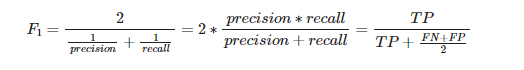

In [36]:
from sklearn.metrics import f1_score


In [37]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846